In [3]:
import pandas as pd
import numpy as np


import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [4]:
df = pd.read_csv('data_california_house.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


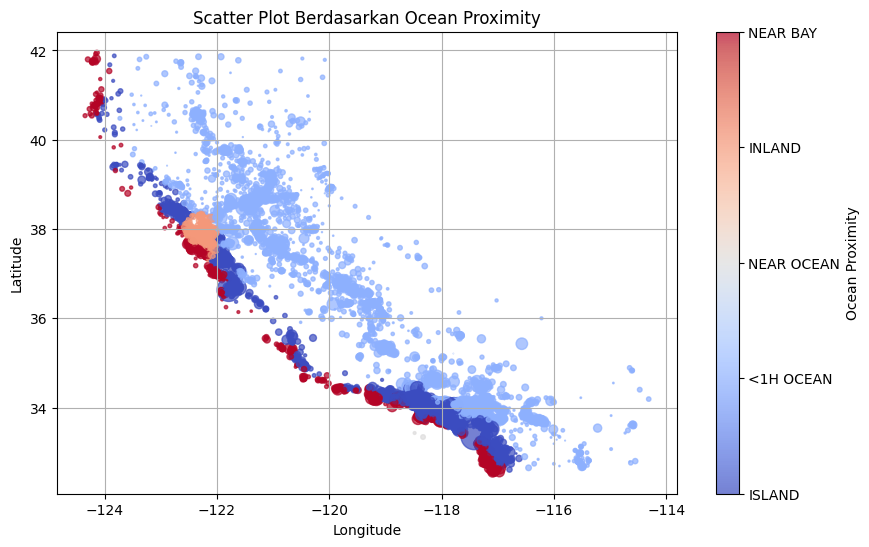

In [5]:
import matplotlib.pyplot as plt

# Assuming df_OceanProximity is a DataFrame containing the unique categories of 'ocean_proximity'
df['ocean_proximity'] = df['ocean_proximity'].astype('category')

plt.figure(figsize=(10, 6))  # Atur ukuran gambar
plt.scatter(df.longitude, df.latitude, c=df.ocean_proximity.cat.codes, cmap='coolwarm', s=df.population/100, alpha=0.7)

# Label sumbu dan judul
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot Berdasarkan Ocean Proximity')

# Colorbar untuk menggambarkan skala ocean_proximity
cbar = plt.colorbar()
cbar.set_ticks(df.ocean_proximity.cat.codes.unique())
cbar.set_ticklabels(df.ocean_proximity.cat.categories) 
cbar.set_label('Ocean Proximity')

plt.grid(True)  
plt.show() 


<Axes: >

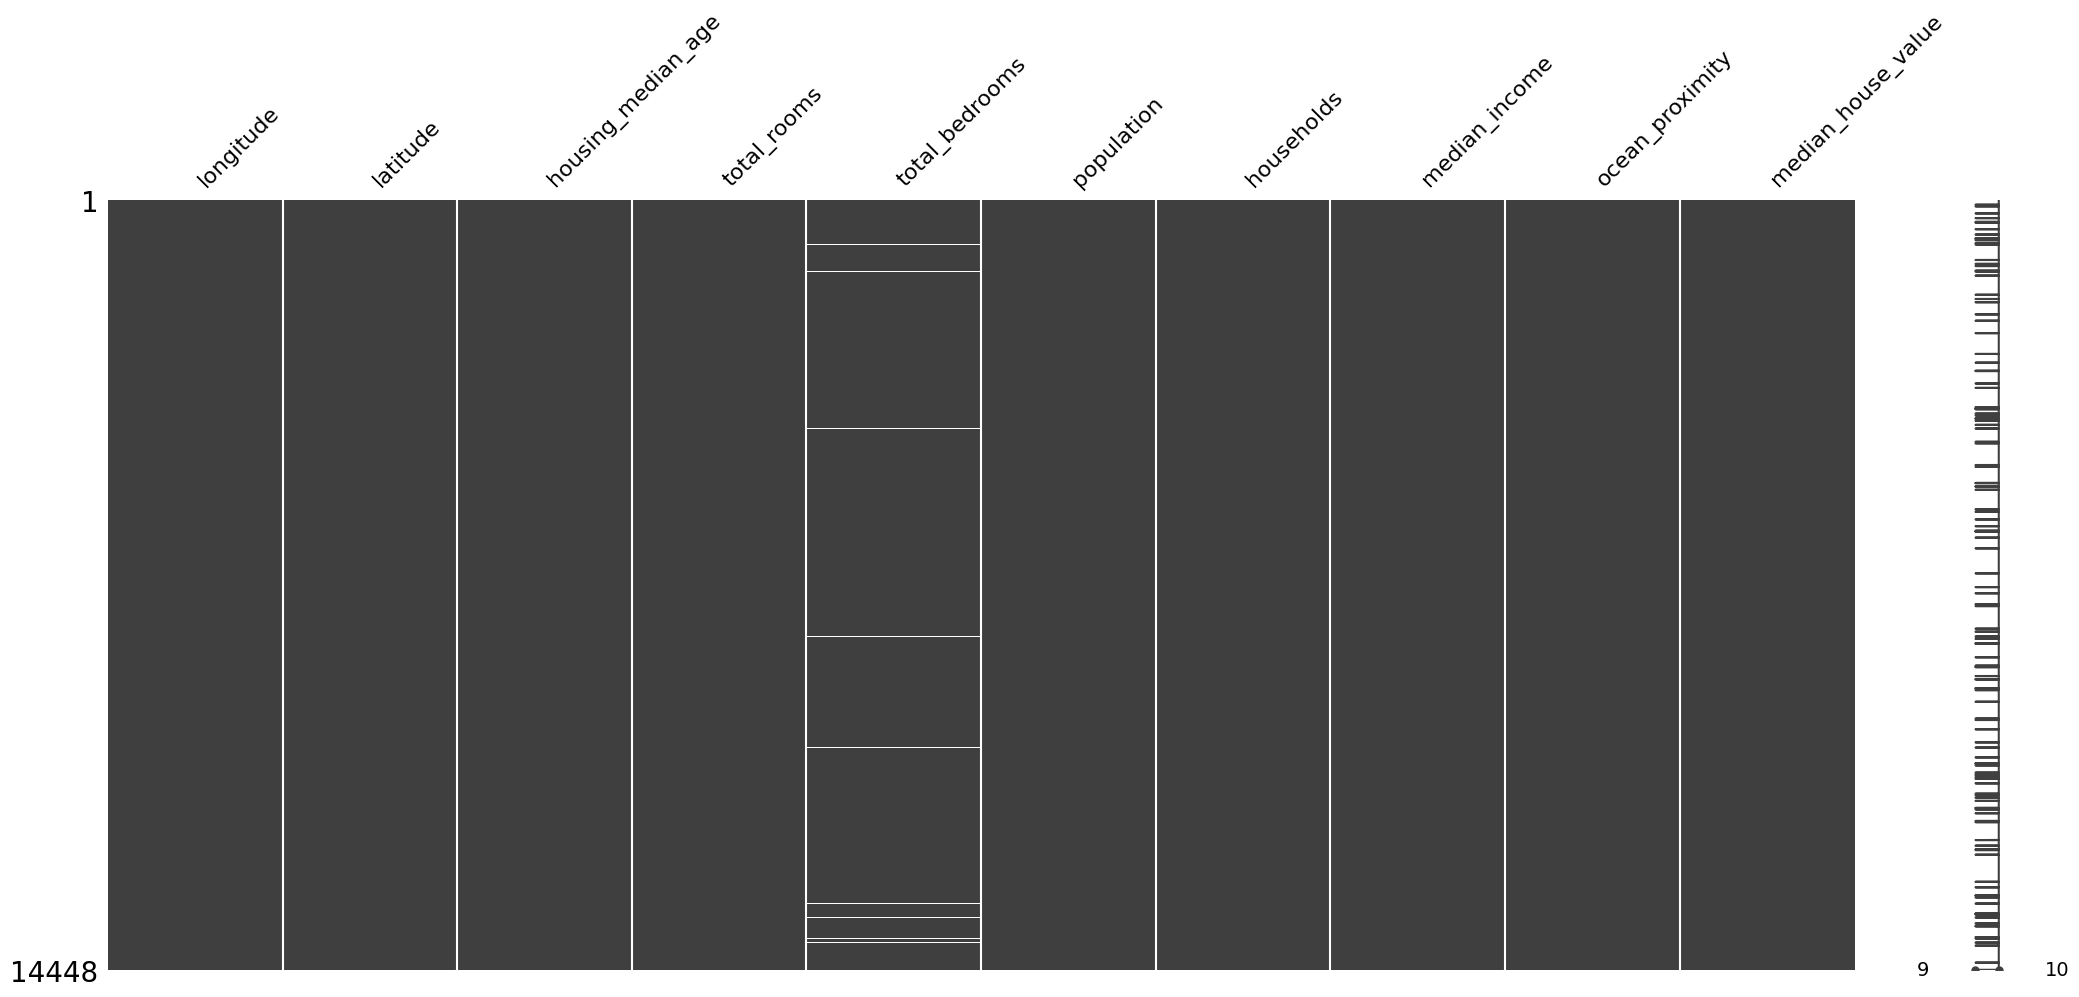

In [7]:
msno.matrix(df)

In [8]:
df.total_bedrooms.isna().sum()

137

In [3]:
df.total_bedrooms.describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

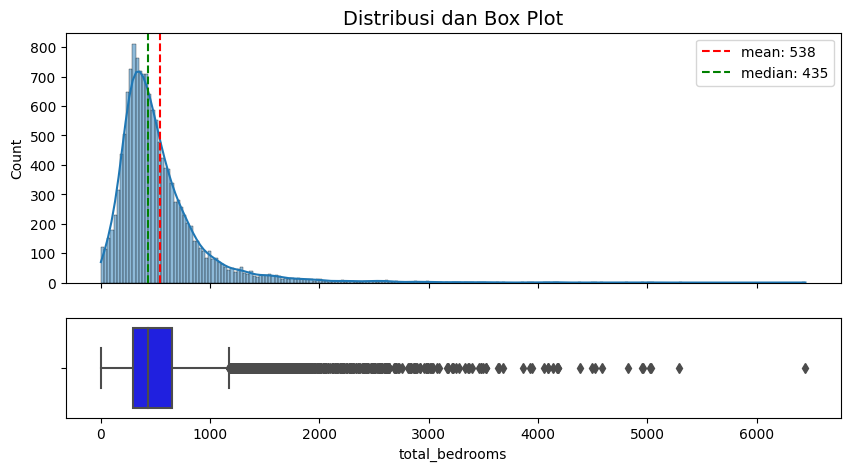

In [16]:
# Membuat figure dan axes
fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1, figsize=(10,5), sharex=True, gridspec_kw={'height_ratios':[5, 2]})

# Menggabungkan displot dan boxplot menggunakan Seaborn
sns.histplot( x=df.total_bedrooms, kde=True, ax=ax1)  # Menampilkan displot
sns.boxplot(x=df.total_bedrooms, ax=ax2, color='Blue') # Menampilkan boxplot

# Menambahkan garis rata-rata dan median
ax1.axvline(x=df['total_bedrooms'].mean(), color='red', label=f"mean: {round(df['total_bedrooms'].mean())}", linestyle='--')
ax1.axvline(x=df['total_bedrooms'].median(), color='green', label=f"median: {round(df['total_bedrooms'].median())}", linestyle='--')

# Memberikan judul dan label pada sumbu
ax1.set_title('Distribusi dan Box Plot', fontsize=14)
ax1.set_xlabel('total_bedrooms', fontsize=12)

# Menampilkan legenda
ax1.legend()

# Menampilkan plot
plt.show()

In [14]:
from scipy.stats import shapiro

# Shapiro-Wilk
statistic, p_value = shapiro(df.total_bedrooms)

# Cek apakah data terdistribusi normal dengan tingkat signifikansi 0.05
if p_value > 0.05:
    print(p_value,"Data terdistribusi normal.")
else:
    print(p_value,"Data tidak terdistribusi normal.")

0.0 Data tidak terdistribusi normal.


c:\Users\KHANZA\.pyenv\pyenv-win\versions\3.9.13\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [4]:
print(f'Jumlah baris dan kolom: {df.shape}')

pd.DataFrame(
    {
    'feature': df.columns.values,
    'data_type': df.dtypes.values,
    'null_value': df.isna().mean().values * 100,
    'neg_value': [True if df[col].dtype == int and (df[col] < 0).any() else False for col in df.columns],
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
    }
)

Jumlah baris dan kolom: (14448, 10)


,feature,data_type,null_value,neg_value,n_unique,sample_unique
0,longitude,float64,0.000000,False,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0.000000,False,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0.000000,False,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0.000000,False,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,0.948228,False,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0.000000,False,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0.000000,False,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0.000000,False,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0.000000,False,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0.000000,False,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


In [5]:
# Mencari outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [6]:
outliers = find_outliers_IQR(df['total_bedrooms'])
print('number of outliers: '+ str(len(outliers)))
print('max outlier value: '+ str(outliers.max()))
print('min outlier value: '+ str(outliers.min()))
outliers

number of outliers: 879
max outlier value: 6445.0
min outlier value: 1176.0


3        1196.0
5        1620.0
9        2275.0
10       1334.0
13       1470.0
          ...  
14343    1683.0
14362    4585.0
14398    2387.0
14405    1233.0
14417    1293.0
Name: total_bedrooms, Length: 879, dtype: float64

In [11]:
14448 - 879

13569

In [18]:
df.total_bedrooms.describe()

count    14311.000000
mean       538.260709
std        423.577544
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64